#### This Notebook is done for Pixelated Data for 1 Compton, 2 PhotoElectric with 2 more Ambiguity!
#### I got 85 % Accuracy on Test set!
##### I am getting X from Blurred Dataset, y as labels from Ground Truth

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import math

df = {'Valid':[],
      'Theta_P1':[], 'Theta_E1':[], 'Theta_P2':[], 'Theta_E2':[], 'Theta_P3':[], 'Theta_E3':[], 'Theta_P4':[], 'Theta_E4':[],
      'y': []}

with open("Data/testfile_output.csv", 'r') as f:
    counter = 0
    counter_Theta_E = 0
    for line in f:
        sline = line.split('\t')

        if len(sline) == 10:
            df['Valid'].append(int(sline[0]))
            df['Theta_P1'].append(float(sline[1]))
            df['Theta_E1'].append(float(sline[2]))
            df['Theta_P2'].append(float(sline[3]))
            df['Theta_E2'].append(float(sline[4]))   
            df['Theta_P3'].append(float(sline[5]))
            df['Theta_E3'].append(float(sline[6]))
            df['Theta_P4'].append(float(sline[7]))
            df['Theta_E4'].append(float(sline[8]))
            
            
            df['y'].append(int(sline[9]))

    
# df.info() Counts Nan in the dataset

df = pd.DataFrame(df)
df.to_csv('GroundTruth.csv', index=False)
df[0:10]


,Valid,Theta_P1,Theta_E1,Theta_P2,Theta_E2,Theta_P3,Theta_E3,Theta_P4,Theta_E4,y
0,1,102.416741,143.906848,143.762940,63.536987,35.303554,63.536987,145.436773,143.906848,3
1,1,60.675876,64.311616,101.990992,139.920473,122.077370,139.920473,159.516701,64.311616,0
2,1,153.811366,97.828112,67.443033,83.214674,73.459382,83.214674,107.430665,97.828112,3
3,1,103.771396,81.434366,141.761897,100.132709,74.812494,81.434366,77.337628,100.132709,3
4,1,123.556662,117.201551,114.104643,117.201551,79.225658,71.684302,67.061360,71.684302,1
5,1,102.217080,146.022964,96.388187,146.022964,150.104757,63.056135,86.156900,63.056135,3
6,1,110.156827,97.352913,127.589169,83.425217,90.677548,83.425217,94.251841,97.352913,2
7,1,138.075538,32.866373,176.104275,180.000000,3.944932,32.866373,85.238159,180.000000,2
8,1,91.712344,147.400034,19.630941,62.872739,160.606833,147.400034,106.701610,62.872739,1
9,1,90.489342,107.826680,150.851392,107.826680,111.265900,76.710593,29.627575,76.710593,3


In [2]:
X = []
y = []


df = pd.read_csv('GroundTruth.csv')
for i in range(0, len(df)-1, 1): # these are from Blurred Data!
    features = df.loc[i, 'Theta_P1':'Theta_E4'].values.tolist()
    label = df.loc[i, 'y':'y'].values.tolist()
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)
y = to_categorical(y, num_classes=None, dtype='float32')

# wrong_ID_label = y.max() + 1 # MAximum label_number + 1 

# for i in (range(len(y))):
#     if df.loc[i, 'Valid':'Valid'].values.tolist() == [0.0]:
#         y = wrong_ID_label
        
        
# # print(y.max())
# y = to_categorical(y, num_classes=None, dtype='float32')

# print(y[0])

#     ID = df.loc[i,'ID']  # get family ID from blurred dataframe
#     gt_temp_rows = df[df['ID'] == ID] # find corresponding rows in grund truth dataframe
    
#     count = 0
#     if (len(gt_temp_rows)==0) or(len(gt_temp_rows)==1): # yani exactly we have 2 lines!
#         count += 1
#         continue

#     idx = gt_temp_rows.index.tolist()[0] # read the first row's index
    
# #     print(len(gt_temp_rows))
# #     print(gt_temp_rows.index.tolist())
# # #     set the target value
# #     print('********************')
# #     print('eventID_label:', int(sline[0]))
# #     print(gt_temp_rows)
#     if (gt_temp_rows.loc[idx, 'DDA':'DDA'].item() <= gt_temp_rows.loc[idx+1, 'DDA':'DDA'].item()):
#         label = 1
#     else:
#         label = 0

#     X.append(row1)
#     y.append(label)

    
# X = np.array(X)
# y = np.array(y)
# # print(y)
# y = to_categorical(y, num_classes=None, dtype='float32')
# # print(y)



In [3]:
y

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Define the Model

In [9]:
# Define the keras model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu')) #8, 8: 58  12, 8:64    32,16: 66   16,16: 67
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(y.shape[1], activation='softmax'))
model.summary()#CNN, LSTM, RNN, Residual, dense

print(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss: categorical_crossentropy (softmax output vector mide: multi class classification) 
#binary_crossentropy (sigmoid output: binary classification)
#mean_squared_error MSE

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=250, batch_size=10, validation_split=0.15)

Epoch 1/250
2537/2537 [==============================] - 2s 634us/step - loss: 1.1459 - accuracy: 0.6110 - val_loss: 0.8593 - val_accuracy: 0.6527
Epoch 2/250
2537/2537 [==============================] - 2s 606us/step - loss: 0.7320 - accuracy: 0.7230 - val_loss: 0.7186 - val_accuracy: 0.7302
Epoch 3/250
2537/2537 [==============================] - 2s 601us/step - loss: 0.6700 - accuracy: 0.7479 - val_loss: 0.6768 - val_accuracy: 0.7597
Epoch 4/250
2537/2537 [==============================] - 2s 598us/step - loss: 0.6344 - accuracy: 0.7584 - val_loss: 0.6390 - val_accuracy: 0.7675
Epoch 5/250
2537/2537 [==============================] - 1s 572us/step - loss: 0.6065 - accuracy: 0.7704 - val_loss: 0.6284 - val_accuracy: 0.7673
Epoch 6/250
2537/2537 [==============================] - 1s 582us/step - loss: 0.5873 - accuracy: 0.7780 - val_loss: 0.6474 - val_accuracy: 0.7570
Epoch 7/250
2537/2537 [==============================] - 1s 576us/step - loss: 0.5636 - accuracy: 0.7903 - val_loss: 0

2537/2537 [==============================] - 2s 625us/step - loss: 0.4245 - accuracy: 0.8497 - val_loss: 0.4782 - val_accuracy: 0.8358
Epoch 57/250
2537/2537 [==============================] - 2s 613us/step - loss: 0.4249 - accuracy: 0.8501 - val_loss: 0.4977 - val_accuracy: 0.8282
Epoch 58/250
2537/2537 [==============================] - 2s 628us/step - loss: 0.4208 - accuracy: 0.8488 - val_loss: 0.4788 - val_accuracy: 0.8443
Epoch 59/250
2537/2537 [==============================] - 2s 636us/step - loss: 0.4226 - accuracy: 0.8489 - val_loss: 0.5559 - val_accuracy: 0.8097
Epoch 60/250
2537/2537 [==============================] - 2s 625us/step - loss: 0.4183 - accuracy: 0.8509 - val_loss: 0.4880 - val_accuracy: 0.8378
Epoch 61/250
2537/2537 [==============================] - 2s 616us/step - loss: 0.4167 - accuracy: 0.8512 - val_loss: 0.5011 - val_accuracy: 0.8316
Epoch 62/250
2537/2537 [==============================] - 2s 626us/step - loss: 0.4148 - accuracy: 0.8511 - val_loss: 0.4905 

2537/2537 [==============================] - 2s 641us/step - loss: 0.3932 - accuracy: 0.8618 - val_loss: 0.5055 - val_accuracy: 0.8329
Epoch 112/250
2537/2537 [==============================] - 2s 596us/step - loss: 0.3939 - accuracy: 0.8623 - val_loss: 0.4805 - val_accuracy: 0.8450
Epoch 113/250
2537/2537 [==============================] - 1s 586us/step - loss: 0.3931 - accuracy: 0.8602 - val_loss: 0.4953 - val_accuracy: 0.8439
Epoch 114/250
2537/2537 [==============================] - 2s 619us/step - loss: 0.3947 - accuracy: 0.8608 - val_loss: 0.5313 - val_accuracy: 0.8338
Epoch 115/250
2537/2537 [==============================] - 2s 599us/step - loss: 0.3950 - accuracy: 0.8634 - val_loss: 0.4941 - val_accuracy: 0.8472
Epoch 116/250
2537/2537 [==============================] - 2s 592us/step - loss: 0.3913 - accuracy: 0.8633 - val_loss: 0.4764 - val_accuracy: 0.8443
Epoch 117/250
2537/2537 [==============================] - 2s 612us/step - loss: 0.3918 - accuracy: 0.8630 - val_loss: 0

2537/2537 [==============================] - 2s 669us/step - loss: 0.3840 - accuracy: 0.8663 - val_loss: 0.4906 - val_accuracy: 0.8544
Epoch 167/250
2537/2537 [==============================] - 2s 636us/step - loss: 0.3784 - accuracy: 0.8696 - val_loss: 0.4739 - val_accuracy: 0.8555
Epoch 168/250
2537/2537 [==============================] - 2s 633us/step - loss: 0.3809 - accuracy: 0.8682 - val_loss: 0.5052 - val_accuracy: 0.8432
Epoch 169/250
2537/2537 [==============================] - 2s 604us/step - loss: 0.3821 - accuracy: 0.8667 - val_loss: 0.4823 - val_accuracy: 0.8396
Epoch 170/250
2537/2537 [==============================] - 2s 618us/step - loss: 0.3864 - accuracy: 0.8645 - val_loss: 0.4960 - val_accuracy: 0.8486
Epoch 171/250
2537/2537 [==============================] - 2s 608us/step - loss: 0.3789 - accuracy: 0.8692 - val_loss: 0.4816 - val_accuracy: 0.8474
Epoch 172/250
2537/2537 [==============================] - 2s 631us/step - loss: 0.3792 - accuracy: 0.8672 - val_loss: 0

2537/2537 [==============================] - 2s 609us/step - loss: 0.3705 - accuracy: 0.8727 - val_loss: 0.5381 - val_accuracy: 0.8363
Epoch 222/250
2537/2537 [==============================] - 2s 611us/step - loss: 0.3765 - accuracy: 0.8715 - val_loss: 0.4819 - val_accuracy: 0.8436
Epoch 223/250
2537/2537 [==============================] - 2s 641us/step - loss: 0.3701 - accuracy: 0.8722 - val_loss: 0.5353 - val_accuracy: 0.8495
Epoch 224/250
2537/2537 [==============================] - 2s 645us/step - loss: 0.3752 - accuracy: 0.8692 - val_loss: 0.5178 - val_accuracy: 0.8461
Epoch 225/250
2537/2537 [==============================] - 2s 642us/step - loss: 0.3740 - accuracy: 0.8711 - val_loss: 0.5243 - val_accuracy: 0.8483
Epoch 226/250
2537/2537 [==============================] - 2s 639us/step - loss: 0.3735 - accuracy: 0.8736 - val_loss: 0.5011 - val_accuracy: 0.8557
Epoch 227/250
2537/2537 [==============================] - 2s 617us/step - loss: 0.3752 - accuracy: 0.8714 - val_loss: 0

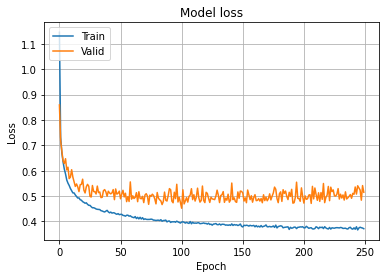

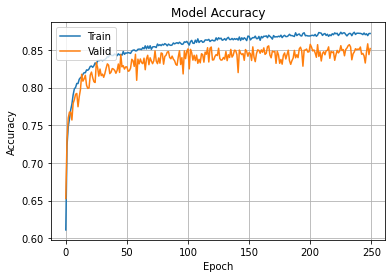

In [13]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()

In [14]:
# Evaluating trained model on test set. This Accuracy came from DDA Labeling
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

234/234 [==============================] - 0s 569us/step - loss: 0.4914 - accuracy: 0.8471
Accuracy: 84.71


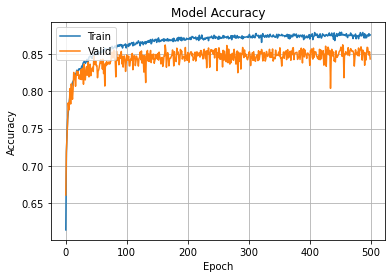

In [15]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Valid'], loc='upper left')
# plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
# plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()

# HyperParameterOptimization

In [30]:
def create_model(hyperParams):
    
    hidden_layers = hyperParams['hidden_layers']
    activation = hyperParams['activation']
    dropout = hyperParams['dropout']
    output_activation = hyperParams['output_activation']
    loss = hyperParams['loss']
    input_size = hyperParams['input_size']
    output_size = hyperParams['output_size']
    
    model = Sequential()
    
    model.add(Dense(hidden_layers[0], input_shape=(input_size,), activation=activation))
    model.add(Dropout(dropout))
    for i in range(len(hidden_layers)-1):
        model.add(Dense(hidden_layers[i], activation=activation))
        model.add(Dropout(dropout))
    model.add(Dense(output_size, activation=output_activation))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    # categorical_crossentropy, binary_crossentropy
    
    return model

In [31]:
def cv_model_fit(X, y, hyperParams):
    
    kfold = KFold(n_splits=10, shuffle=True)
    scores=[]
    for train_idx, test_idx in kfold.split(X):
        model = create_model(hyperParams)
#         model.summary() # show model
        model.fit(X[train_idx], y[train_idx], batch_size=hyperParams['batch_size'], 
                   epochs=hyperParams['epochs'], verbose=0)
        score = model.evaluate(X[test_idx], y[test_idx], verbose=0)
        
        scores.append(score*100) # f_score
#         print('fold ', len(scores), '  score: ', scores[-1])
        del model
        
    return scores

In [ ]:
# hyper parameter optimization
from itertools import product
from sklearn.model_selection import KFold
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D

# default parameter setting:
hyperParams = {'input_size': X.shape[1], 'output_size': y.shape[1], 'batch_size': 32, 'epochs': 100, 'hidden_layers': [512, 512, 128],
               'activation': 'relu', 'dropout': 0.5, 'output_activation': 'softmax', 'loss': 'categorical_crossentropy'}

# parameter search space:
batch_chices = [32]
epochs_choices = [100]
hidden_layers_choices = [[16, 32],
                         [8, 8, 8], [4, 8, 16], [32, 32, 64]]
activation_choices = ['relu', 'sigmoid'] #, 'tanh'
dropout_choices = [ 0.5]

s = [batch_chices, epochs_choices, hidden_layers_choices, activation_choices, dropout_choices]
perms = list(product(*s))  # permutations

# Linear search:
best_score = 0
for row in perms:
    hyperParams['batch_size'] = row[0]
    hyperParams['epochs'] = row[1]
    hyperParams['hidden_layers'] = row[2]
    hyperParams['activation'] = row[3]
    hyperParams['dropout'] = row[4]
    print('10-fold cross validation on these hyperparameters: ', hyperParams, '\n')
    cvscores = cv_model_fit(X, y, hyperParams)
    print('\n-------------------------------------------')
    mean_score = np.mean(cvscores)
    std_score = np.std(cvscores)
    # Update the best parameter setting:
    print('CV mean: {0:0.4f},  CV std: {1:0.4f}'.format(mean_score, std_score))
    if  mean_score > best_score:    # later I should incorporate std in best model selection
        best_score = mean_score
        print('****** Best model so far ******')
        best_params = hyperParams
    print('-------------------------------------------\n')

10-fold cross validation on these hyperparameters:  {'input_size': 8, 'output_size': 5, 'batch_size': 32, 'epochs': 100, 'hidden_layers': [16, 32], 'activation': 'relu', 'dropout': 0.5, 'output_activation': 'softmax', 'loss': 'categorical_crossentropy'} 


-------------------------------------------
CV mean: 0.8542,  CV std: 0.4222
****** Best model so far ******
-------------------------------------------

10-fold cross validation on these hyperparameters:  {'input_size': 8, 'output_size': 5, 'batch_size': 32, 'epochs': 100, 'hidden_layers': [16, 32], 'activation': 'sigmoid', 'dropout': 0.5, 'output_activation': 'softmax', 'loss': 'categorical_crossentropy'} 


-------------------------------------------
CV mean: 0.8765,  CV std: 0.3318
****** Best model so far ******
-------------------------------------------

10-fold cross validation on these hyperparameters:  {'input_size': 8, 'output_size': 5, 'batch_size': 32, 'epochs': 100, 'hidden_layers': [8, 8, 8], 'activation': 'relu', 'dro